### The Large Hadron Collider
The Large Hadron Collider is the largest particle accelerator in the world. It is the central device used in the field of particle physics. The collider accelerates proton (hadrons) around a giant tunnel near the speed of light and collides them together at the detector interation point (IP). The Detector in question is the ATLAS detector. At this detector, is where the particles are meant to interact and where can study the result of the particle collision. This collision causes a massive burst of energy and many different subatomic particles are produced including muons, electrons, neutrinos, etc. Working with these particles and their interactions could give us new ideas, help us understand the physics better, and perhaps discover particles beyond our current knowledge.
https://home.cern/science/accelerators/large-hadron-collider

### The standard Model of Physics
The particle physics field is based off the the standard model of particles. The standrd model consists of 12 particles with 1/2 spin, known as fermions, and 5 particles with integer spin, known as bosons. Fermions comprise of all matter known in the universe including electrons, protons, etc. Bosons represent 3 of the 4 fundamental forces of nature (all except gravitational). The last boson (Higgs) is associated with the Higgs field responsible for the mass for the other subatomic particles.
Source: PhD Student John Spencer's Thesis

![Standard Model](Standard_Model_of_Elementary_Particles.svg)

### Particle Jets
Working in particle physics is a probabilistic process and to make any sort of progress, many particle are collided so that we can, for example, find a signal. A jet is a stream of particles that travel in the same direction in the detector. A particle jet can be described by a cone with a size that is equivalent to the magnitudes of eta and phi (see below). With these jets, we are able to send many particles at once to the interaction point and have many collisions. 
https://arxiv.org/abs/1201.0008.

In this project, we will be analyzing the search for the Higgs boson in hadron collisions at 13 TeV using Alex Schuy's simulation data. First, let's define the variables that will be used in this research:

| Variable | Definition | 
| --- | --- |
| pt | Momentum in transverse direction as the particle beam axis. | 
| eta | pseudorapidity. A geometric quantity that is a function of polar angle with respect to beam axis. |
| phi | The asimuthal dimension of the particle jet cone. |
| ee2 & ee3 | energy correlation functions that describe distributions of the energy of particles hard scattered |
| d2 | ratio of ee2 to ee3 |
| angularity | can be seen as a measure of QCD radiation around the jet axis, i.e. as the radiation in a one-pronged jet. |
| t1 | 1 subjettiness |
| t2 | 2 subjettiness |
| t3 | 3 subjettiness |
| subjettiness | Describes the shape of the particle jet |
| t21 | ratio of t2 to t1 |
| t32 | ratio of t3 to t2 |
| ktDeltaR | the difference between two cones (delta R) of two subjets within the large R jet |


Source: https://atlas.web.cern.ch/Atlas/GROUPS/PHYSICS/PAPERS/PERF-2017-04/

### Data Exploration

In [7]:
import pickle
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
from scipy import stats
from scipy.stats import poisson
from scipy.stats import norm

In [8]:
# open the file of interest, and use pickle loading
signal_file = open ("Sample_pt_250_500.pkl",'rb')
sample_dict = pickle.load(signal_file)

# list all keys of the files
sample_dict.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [9]:
background_file = open ("qcd_100000_pt_250_500.pkl",'rb')
background_dict = pickle.load(background_file)

# list all keys of the files
background_dict.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

First, let's explore the differences between the background (QCD) and signal (Higgs) data. We need to see if we can differentiate between the two.

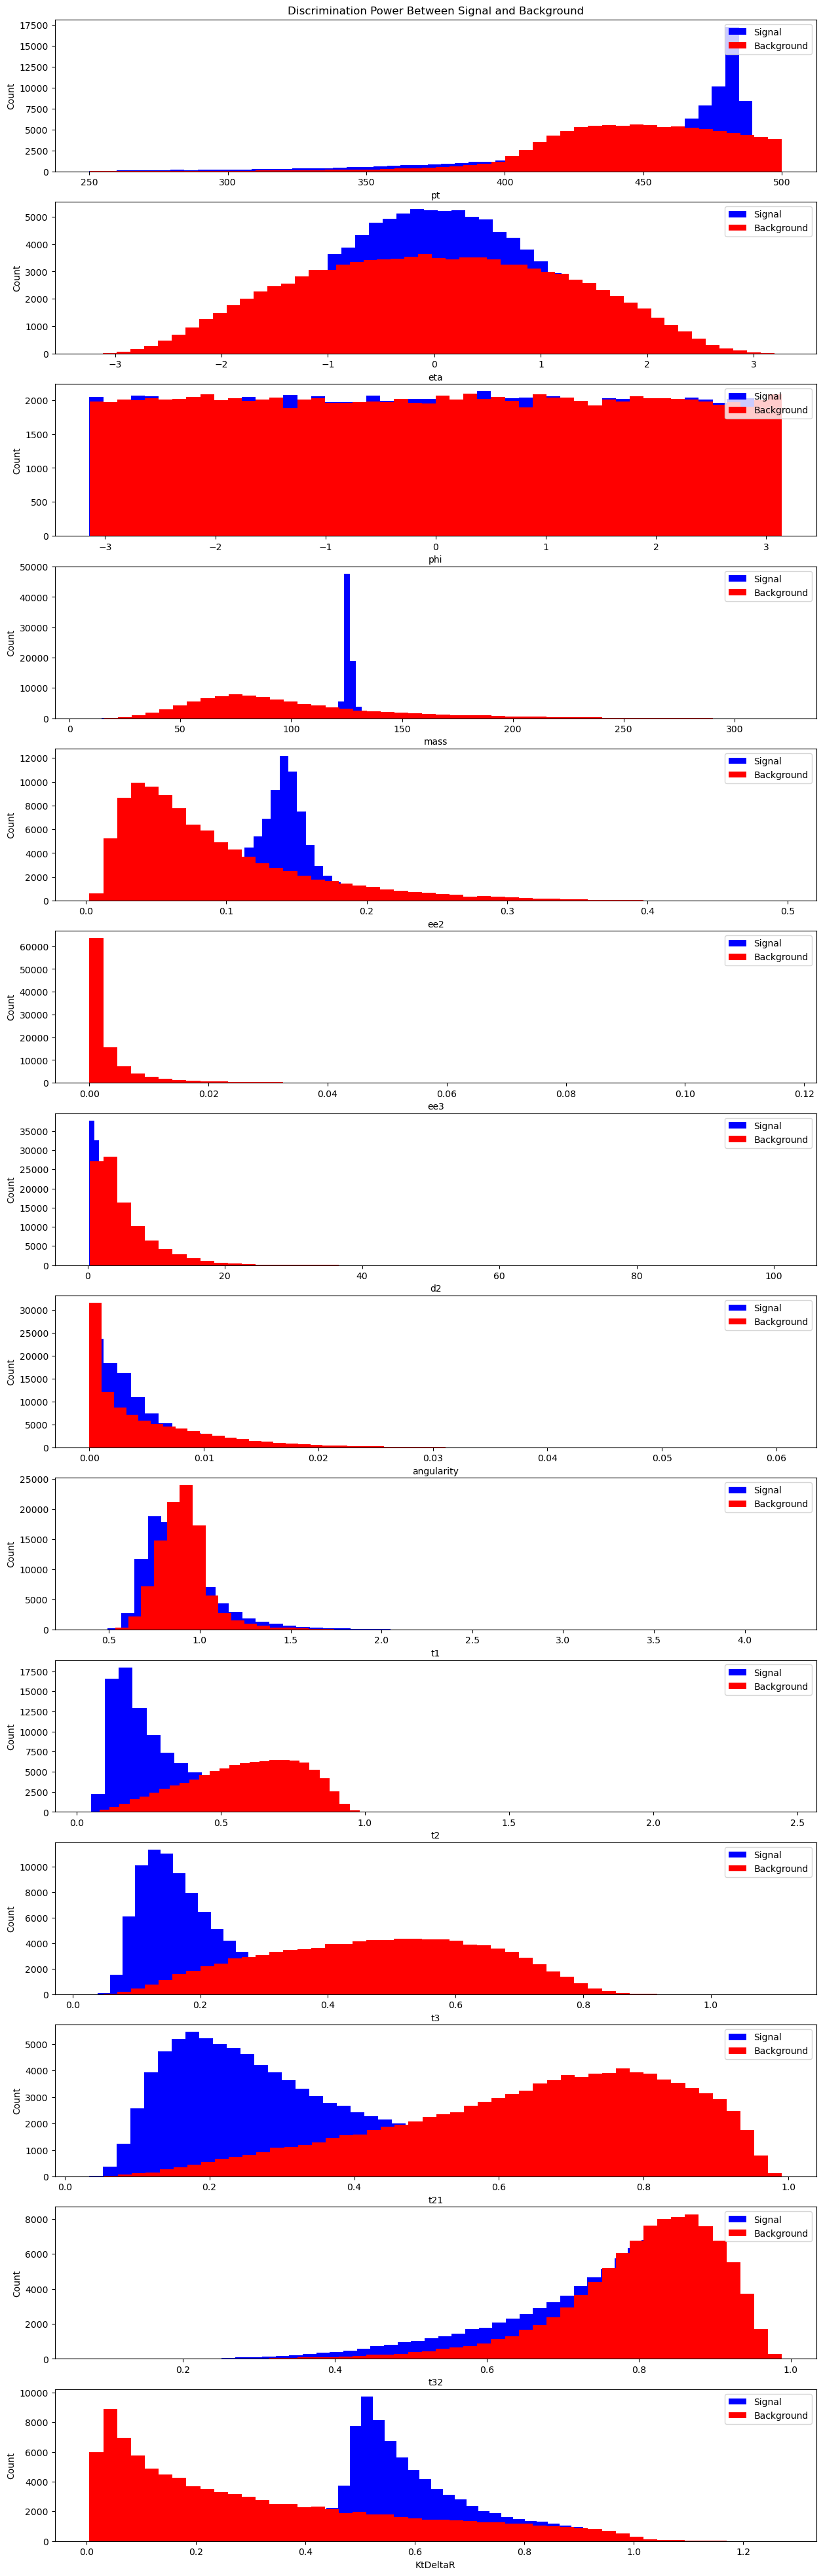

In [9]:
#there are 14 variables to check
fig,ax = plt.subplots(14,1, figsize = (15,50))
variables = ['pt','eta','phi','mass','ee2','ee3','d2','angularity','t1','t2','t3','t21','t32','KtDeltaR']
for i in range(0,14):
    ax[i].hist(sample_dict[variables[i]],color='blue',label= 'Signal',bins=50)
    ax[i].hist(background_dict[variables[i]],color='red',label= 'Background',bins = 50)
    ax[i].set_xlabel(variables[i])
    ax[i].set_ylabel('Count')
    ax[0].set_title('Discrimination Power Between Signal and Background')
    ax[i].legend(loc='upper right')
plt.show()


For most experiment variables, we are able to distinguish between the signal and background. Some, however, it is a little difficult to distinguish: phi, angularity, t32.

In [10]:
sample_pt = sample_dict['pt']
sample_eta = sample_dict['eta']     
sample_phi = sample_dict['phi']     
sample_mass = sample_dict['mass']
sample_ee2 = sample_dict['ee2']       
sample_ee3 = sample_dict['ee3']     
sample_d2 = sample_dict['d2']
sample_angularity = sample_dict['angularity']   
sample_t1 = sample_dict['t1']
sample_t2 = sample_dict['t2']
sample_t3 = sample_dict['t3']
sample_t21 = sample_dict['t21']
sample_t32 = sample_dict['t32']
sample_ktDeltaR = sample_dict['KtDeltaR']

In [11]:
background_pt = background_dict['pt']
background_eta = background_dict['eta']     
background_phi = background_dict['phi']     
background_mass = background_dict['mass']
background_ee2 = background_dict['ee2']       
background_ee3 = background_dict['ee3']     
background_d2 = background_dict['d2']
background_angularity = background_dict['angularity']   
background_t1 = background_dict['t1']
background_t2 = background_dict['t2']
background_t3 = background_dict['t3']
background_t21 = background_dict['t21']
background_t32 = background_dict['t32']
background_ktDeltaR = background_dict['KtDeltaR']

Now let's explore some relationships. We expect that the energy of a particle to decrease as its mass decreases, let's find out.

In [16]:
def plt_energy_mass(sampleX,sampleY,backgroundX,backgroundY):
    fig,ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].scatter(sample_mass,sample_ee2)
    ax[0].set_title('Energy and Mass Correlation of the Signal Particle')
    ax[0].set_xlabel('Mass')
    ax[0].set_ylabel('Energy')
    ax[1].scatter(background_mass,background_ee2)
    ax[1].set_title('Energy and Mass Correlation of the Background Particle')
    ax[1].set_xlabel('Mass')
    ax[1].set_ylabel('Energy')

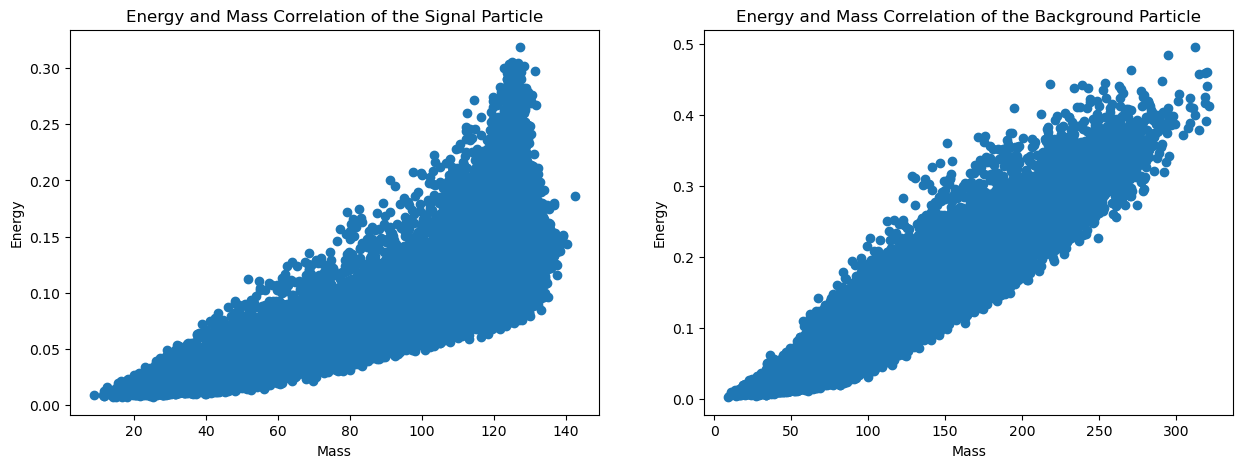

In [17]:
plt_energy_mass(sample_mass,sample_ee2,background_mass,background_ee2)

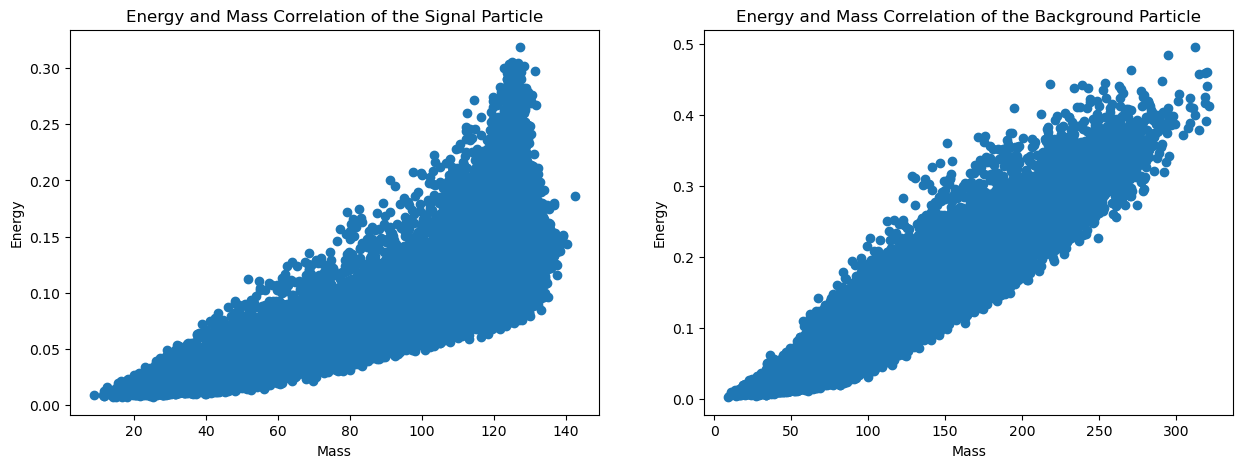

In [18]:
plt_energy_mass(sample_mass,sample_ee3,background_mass,background_ee3)

Above shows the mass-energy correlation of higgs particles (left) and the QCD (right). This proves my assumption of the energy-mass correlation of the particles we are studying. It might also be worth exploring the variables t1,t2,and t3 which describe the shape of the particle jet we are studying

In [32]:
from mpl_toolkits.mplot3d import Axes3D
def jet_shape(t1,t2,t3,data_type):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(t1,t2,t3)
    ax.set_title('Particle Jet Shape With ' + str(data_type) + ' Data')
    ax.set_xlabel('t1')
    ax.set_ylabel('t2')
    ax.set_zlabel('t3')
    ax.view_init(30, 60)

<ipython-input-32-89a4fde6b38f>:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


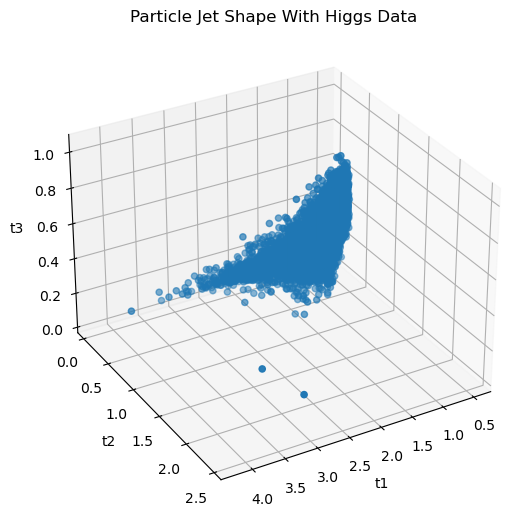

In [33]:
jet_shape(sample_t1,sample_t2,sample_t3,'Higgs')

<ipython-input-32-89a4fde6b38f>:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


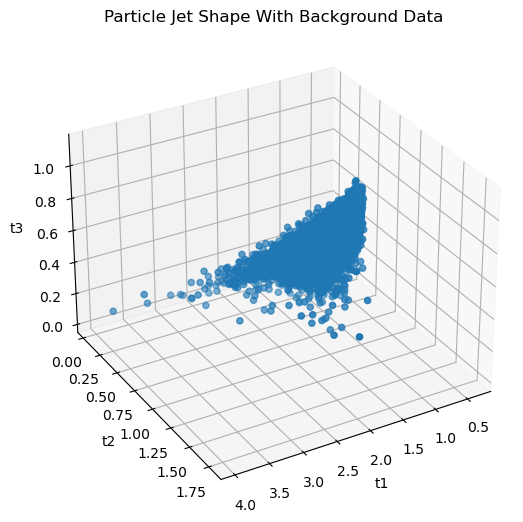

In [34]:
jet_shape(background_t1,background_t2,background_t3,'Background')

It looks like the jet begins at a concentrated point (0,0,0) and spreads out as expected from a particle jet. So, while t1, t2, and t3 could be independent of each other they help to describe the same picture. Let's see if there is any correlation with mass and energy.

In [35]:
def plt_mass_tn(sampleX,sampleY,backgroundX,backgroundY):
    fig,ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].scatter(sampleX,sampleX)
    ax[0].set_title('Mass and tn Correlation in Higgs Data')
    ax[0].set_xlabel('tn')
    ax[0].set_ylabel('Mass')
    ax[1].scatter(backgroundX,backgroundX)
    ax[1].set_title('Mass and tn Correlation in QCD Data')
    ax[1].set_xlabel('tn')
    ax[1].set_ylabel('Mass')

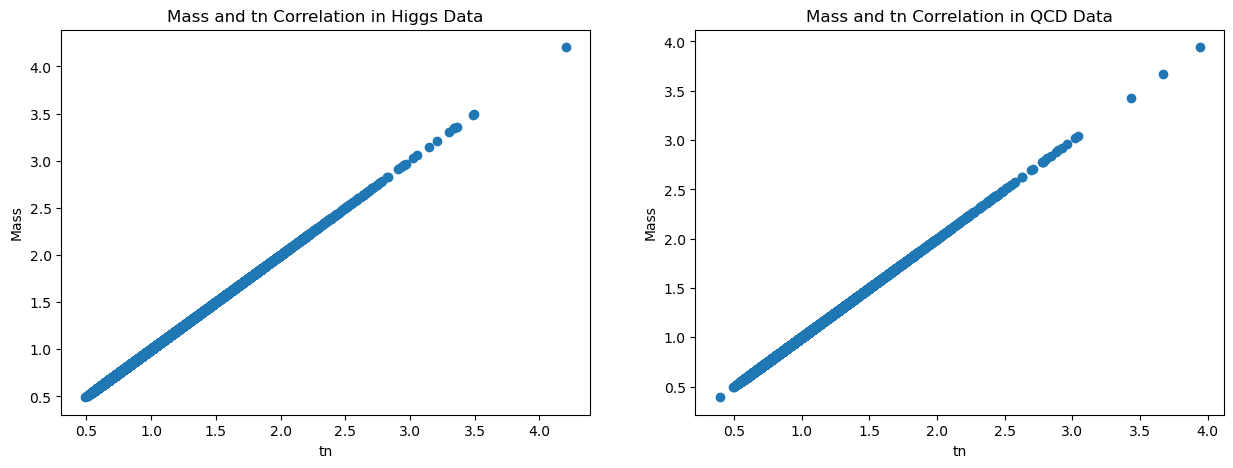

In [36]:
plt_mass_tn(sample_t1,sample_mass,background_t1,background_mass)

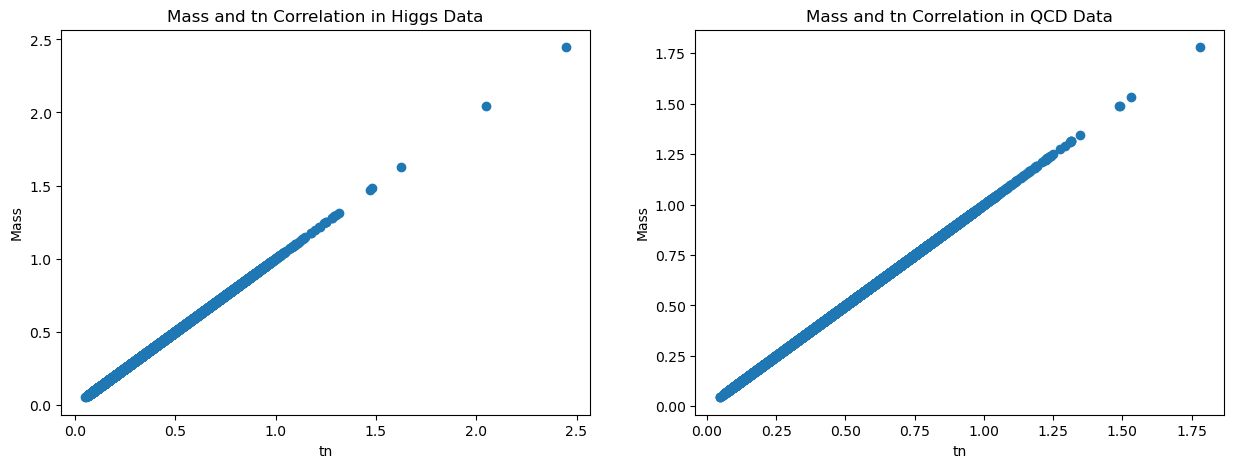

In [37]:
plt_mass_tn(sample_t2,sample_mass,background_t2,background_mass)

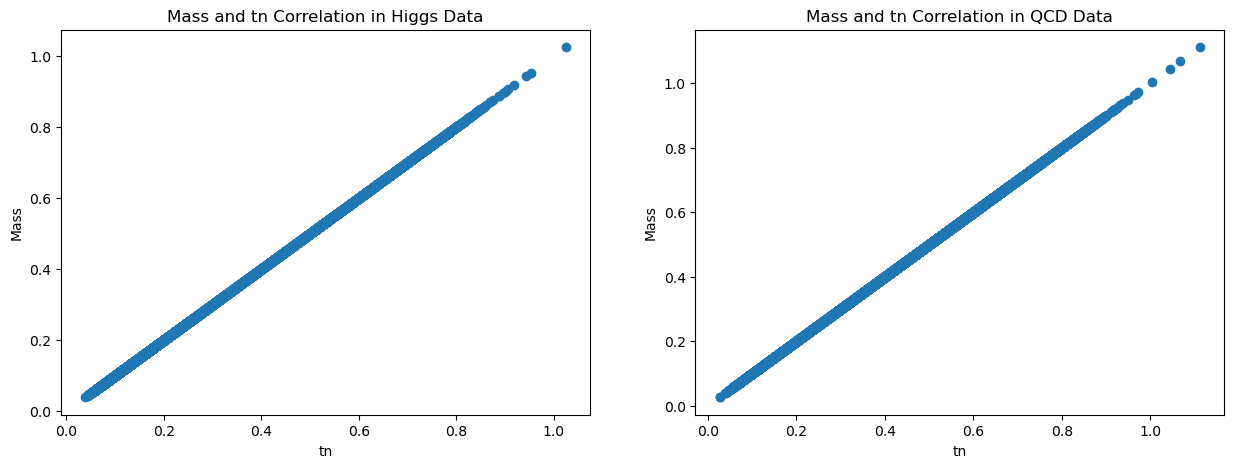

In [38]:
plt_mass_tn(sample_t3,sample_mass,background_t3,background_mass)

We can see a positive correlation. We know that the jet shape will also have a positive correlation with energy due to mass and energy relationship discussed before.

Now, we want to find the significance of our signal and eventually optimize the discovery sensitivity. In my data set, I am provided with 100 Higgs signals and 20000 background signals so we can make a preliminary calculation of the probability.

In [39]:
probability = poisson.cdf(20100,20000)
1 - probability

0.2384721219068744

We can optimize this by making an accurate background probability density function appropriate to our data and making cuts on background data. This will help improve the purity of the signal data. 